In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import tensorflow as tf

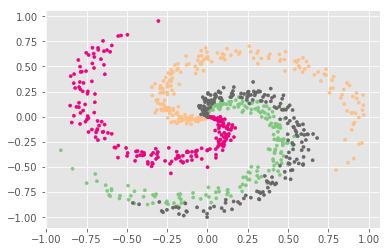

In [2]:
N = 200 
D = 2 
K = 4 
X = np.zeros((N*K,D)) 
y = np.zeros(N*K, dtype='uint8')
for j in range(K):
    ix = range(N*j,N*(j+1))
    r = np.linspace(0.0,1,N)
    t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j

plt.scatter(X[:,0], X[:,1], c=y, s=10, cmap=plt.cm.Accent)
plt.show()

In [3]:
X.shape

(800, 2)

In [4]:
n_ys = np.max(y) + 1
y_one_hot = np.eye(n_ys)[y]
y_one_hot.shape

(800, 4)

2.7636344


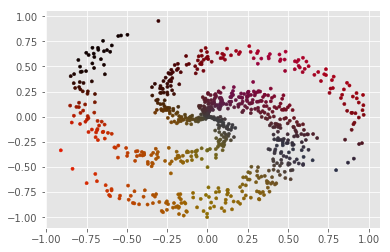

2.0106926


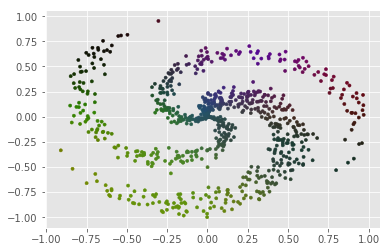

0.5461268


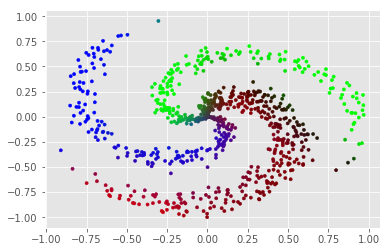

0.30933988


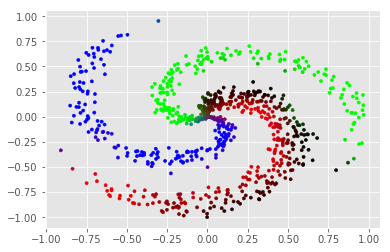

0.2358028


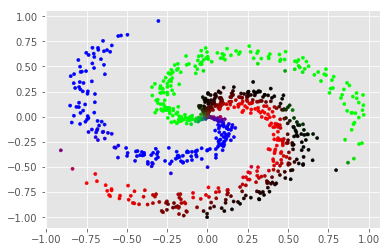

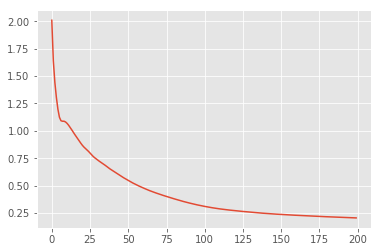

In [5]:
np.warnings.filterwarnings('ignore')

iterations = 200
alpha = 0.1
layers_dims = [D,16,K]
L = len(layers_dims)-1

x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)


param = {}
for l in range(1,L+1):
    param['w'+str(l)] = tf.Variable(tf.random.normal([layers_dims[l-1],layers_dims[l]]))
    param['b'+str(l)] = tf.Variable(tf.zeros(layers_dims[l])) 

cache = {}
a_prev = x
for l in range(1,L):
    cache['z'+str(l)] = tf.add(tf.matmul(a_prev,param['w'+str(l)]),param['b'+str(l)])
    cache['a'+str(l)] = tf.nn.relu(cache['z'+str(l)])
    a_prev = cache['a'+str(l)]
cache['z'+str(L)] = tf.add(tf.matmul(a_prev,param['w'+str(L)]),param['b'+str(L)])
cache['a'+str(L)] = tf.nn.softmax(cache['z'+str(L)])

cost = tf.reduce_mean(-tf.reduce_sum(y * tf.log(cache['a'+str(L)]), [1]))
optimizer = tf.train.AdamOptimizer(learning_rate = alpha)
train = optimizer.minimize(cost)

init = tf.global_variables_initializer()

cost_hist = []

with tf.Session() as sess:
    sess.run(init)
    var_dict = {x:X,y:y_one_hot}
    print(sess.run(cost, feed_dict = var_dict))
    plt.scatter(X[:,0], X[:,1], c=sess.run(cache['a'+str(L)], feed_dict = var_dict),s=10,alpha=1.)
    plt.show()
    for i in range(iterations):
        sess.run(train, feed_dict = var_dict)
        cost_hist.append(sess.run(cost, feed_dict = var_dict))
        if i % 50 == 0:
            print(sess.run(cost, feed_dict = var_dict))
            plt.scatter(X[:,0], X[:,1], c=sess.run(cache['a'+str(L)], feed_dict = var_dict),s=10,alpha=1.)
            plt.show()
            
plt.plot(np.arange(iterations),cost_hist)
plt.show()
